In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
import itertools
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Lineups and clusters.csv')
df=df.drop('Unnamed: 0',axis=1)

# For showing the results, a permutation matrix was created with all possible probability lineups in 0.25 intervals. For training the model, the whole set of data was used. 

In [3]:
#Function to round the probabilities to the nearest .25
def round_prob(x):
    if 0.0<= x <0.125:
        x=0.0
    elif 0.125<= x <0.375:
        x=0.25
    elif 0.375<= x <0.625:
        x=0.5
    elif 0.625<= x <0.875:
        x=0.75
    elif 0.875<= x <1.125:
        x=1.0
    elif 1.125<= x <1.375:
        x=1.25
    elif 1.375<= x <1.625:
        x=1.5
    elif 1.625<= x <1.875:
        x=1.75
    elif 1.875<= x <2.125:
        x=2.0
    elif 2.125<= x <2.375:
        x=2.25
    elif 2.375<= x <2.625:
        x=2.5
    elif 2.625<= x <2.875:
        x=2.75
    elif 2.875<= x <3.125:
        x=3.0
    elif 3.125<= x <3.375:
        x=3.25
    elif 3.375<= x <3.625:
        x=3.5
    elif 3.625<= x <3.875:
        x=3.75
    elif 3.875<= x <4.125:
        x=4.0
    else: 
        x=x
    return x

In [4]:
#Applying the round function of above. 
df['Tot prob 0']=df['Tot prob 0'].apply(round_prob)
df['Tot prob 1']=df['Tot prob 1'].apply(round_prob)
df['Tot prob 2']=df['Tot prob 2'].apply(round_prob)
df['Tot prob 3']=df['Tot prob 3'].apply(round_prob)
df['Tot prob 4']=df['Tot prob 4'].apply(round_prob)
df['Tot prob 5']=df['Tot prob 5'].apply(round_prob)
df['Tot prob 6']=df['Tot prob 6'].apply(round_prob)
df['Tot prob 7']=df['Tot prob 7'].apply(round_prob)
df['NRating']=np.around(df['NRating'],2)

In [5]:
train_columns=['Tot prob 0','Tot prob 1','Tot prob 2','Tot prob 3','Tot prob 4','Tot prob 5','Tot prob 6',
              'Tot prob 7']  
target_columns=['NRating']
X= df[train_columns].to_numpy()
Y= df[target_columns].to_numpy()
Y= Y.reshape(Y.shape[0], )

In [6]:
#Creation of the permutation matrix. 
ranges=np.linspace(0,5,21)
comb_replace=list(itertools.combinations_with_replacement(ranges,8))
combis=[]
matrix=[]
#Combinations that sum == 5
for i in comb_replace:
    if sum(i) == 5:
        combis.append(i)
        
#All permutations with the combinations list.
for j in range(len(combis)):
    perm_=list(itertools.permutations(combis[j]))
    for k in perm_:
        matrix.append(k)
        
#Remove duplicate permutations
def removeDuplicates(lst):       
    return [t for t in (set(tuple(l) for l in lst))] 

matrix_2=removeDuplicates(matrix)
test_X=np.array(matrix_2)   #X Test Data

In [7]:
#Best Model to predict
rfr = RandomForestRegressor(n_estimators = 500,max_depth = None,min_samples_split = 2,
                                        max_features = 3,random_state = 1,n_jobs=-1)
rfr.fit(X,Y)
pred_t=rfr.predict(X)
y_pred=rfr.predict(test_X)

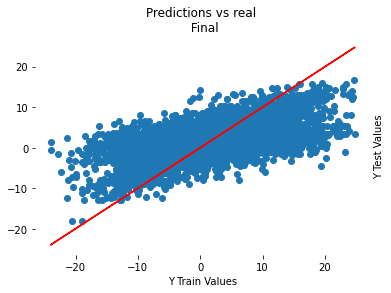

In [8]:
#Plot of the adjustment of train data vs the prediction.
f, (ax1) = plt.subplots(1, 1)

ax1.plot(Y,Y,color='r')
ax1.scatter(Y,pred_t)
ax1.set_title('Predictions vs real \n Final')
ax1.set_xlabel('Y Train Values')
ax1.set_ylabel('Y Test Values')
ax1.yaxis.set_label_position('right')
plt.sca(ax1)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [9]:
#DataFrame of results. 
a=pd.DataFrame(test_X,columns=['cluster 0','cluster 1','cluster 2','cluster 3','cluster 4','cluster 5',
                             'cluster 6','cluster 7'])
a['Pred Net Rating'] = y_pred.tolist()
a.sort_values(by='Pred Net Rating',ascending=False).head(20)  #Showing the best 20 combinations of lineups.

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,Pred Net Rating
224053,0.25,0.00,2.00,1.75,0.00,0.00,0.00,1.00,16.733838
721239,0.75,0.00,1.00,0.75,1.25,1.00,0.00,0.25,15.903119
528587,0.75,0.25,1.00,0.75,1.25,1.00,0.00,0.00,15.813001
618002,0.50,0.00,2.00,0.00,1.50,0.00,1.00,0.00,15.730208
186796,1.00,0.00,1.25,0.75,0.00,2.00,0.00,0.00,15.644990
137541,1.50,0.00,2.25,0.00,1.00,0.00,0.00,0.25,15.057998
689309,0.75,0.00,1.00,0.75,1.25,1.00,0.25,0.00,15.018716
523586,0.50,0.00,1.00,0.00,1.50,0.00,1.00,1.00,14.944953
756698,0.25,0.00,2.00,0.00,1.75,0.00,0.00,1.00,14.777105
851787,1.00,0.00,1.00,0.75,1.25,1.00,0.00,0.00,14.770661


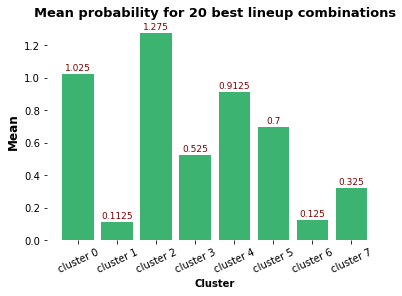

In [10]:
#Bar Graph with the mean values for the 20 best lineups combination. 
hh=a.sort_values(by='Pred Net Rating',ascending=False).head(20)
means=hh.mean().tolist()
means=means[:-1]
x_col = hh.columns[:-1]
bars=plt.bar(x_col,means,align='center',color='mediumseagreen')
plt.xlabel('Cluster',fontweight='bold')
plt.ylabel('Mean',size=12,fontweight='bold')
plt.title('Mean probability for 20 best lineup combinations',alpha=1,fontweight='bold',size=13)
plt.xticks(rotation=25)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, str(float(bar.get_height())), 
                 ha='center', color='maroon', fontsize=9)

# Finally the model predicts that its important to have at least 1 player that shoots 3 pointers, at least 1 superstar, maybe 1 High Usage Guard and try to avoid big guys to improve Net Rating in any team.

# For any doubt about the procedure the README.md will answer it. 
